In [1]:
import pandas as pd
import matplotlib as graph_maker

load oxygen A

In [2]:
oxygenA = pd.read_parquet("../data/cleanedData/oxygenA.parquet")
oxygenA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436189 entries, 0 to 436188
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   oxygenAValue     436189 non-null  float64       
 1   measurementDate  436189 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.7 MB


load oxygen B

In [3]:
oxygenB = pd.read_parquet("../data/cleanedData/oxygenB.parquet")
oxygenB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525469 entries, 0 to 525468
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   oxygenBValue     525469 non-null  float64       
 1   measurementDate  525469 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.0 MB


In [4]:
def calculateOxygen(oxygenA, oxygenB):
    if pd.isna(oxygenA):
        return oxygenB
    elif pd.isna(oxygenB):
        return oxygenA
    else:
        return (oxygenA + oxygenB)/2


Merge oxygen values 

In [5]:
oxygenAB = pd.merge(oxygenA, oxygenB, how="right")
oxygenAB.tail()

,oxygenAValue,measurementDate,oxygenBValue
525584,NaN,2021-12-31 23:56:00,0.549
525585,NaN,2021-12-31 23:57:00,0.559
525586,NaN,2021-12-31 23:58:00,0.554
525587,NaN,2021-12-31 23:59:00,0.568
525588,NaN,2022-01-01 00:00:00,0.563


calculate the average oxygen and create a new column out of it 

In [6]:

oxygenAB["oxygenValue"] = oxygenAB.apply(lambda col: calculateOxygen(col["oxygenAValue"], col["oxygenBValue"]), axis=1)
oxygenAB.drop(["oxygenAValue", "oxygenBValue"], axis=1, inplace=True)


Reorder the column names

In [7]:

oxygen_val_col = oxygenAB.pop("oxygenValue")

oxygenAB.insert(0, "oxygenValue", oxygen_val_col)

oxygenAB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525589 entries, 0 to 525588
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   oxygenValue      525589 non-null  float64       
 1   measurementDate  525589 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 MB


Create boxplot of oxygen values

Text(0.5, 1.0, 'Oxygen values in both tanks')

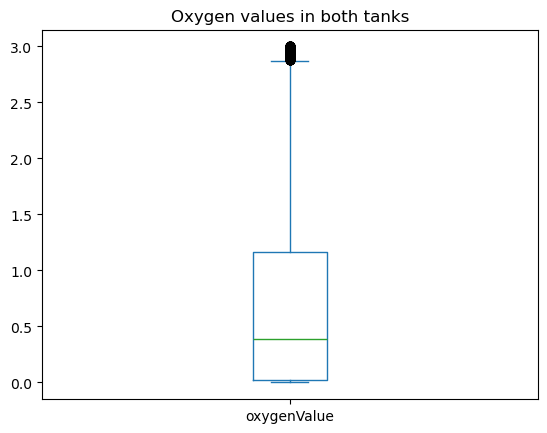

In [8]:
oxygenAB["oxygenValue"].plot.box().set_title("Oxygen values in both tanks")

Create histogram of oxygen values

Text(0.5, 1.0, 'Oxygen values and their frequency')

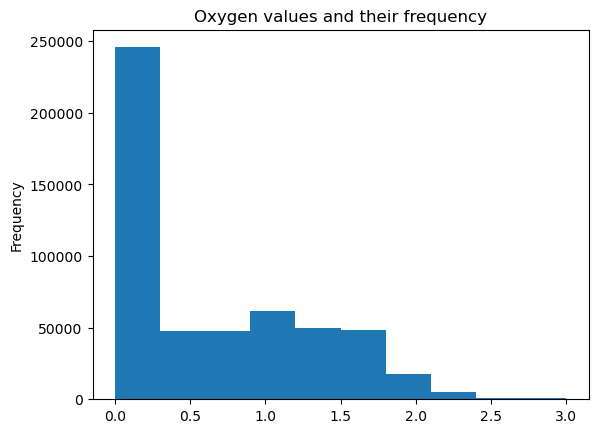

In [13]:
oxygenAB["oxygenValue"].plot.hist().set_title("Oxygen values and their frequency")

In [12]:
oxygenAB

,oxygenValue,measurementDate
0,0.0160,2021-01-01 00:01:00
1,0.0155,2021-01-01 00:02:00
2,0.0155,2021-01-01 00:03:00
3,0.0155,2021-01-01 00:04:00
4,0.0155,2021-01-01 00:05:00
...,...,...
525584,0.5490,2021-12-31 23:56:00
525585,0.5590,2021-12-31 23:57:00
525586,0.5540,2021-12-31 23:58:00
525587,0.5680,2021-12-31 23:59:00


Describe the oxygen values 

In [10]:
oxygenAB["oxygenValue"].describe()

count    525589.000000
mean          0.633813
std           0.654875
min           0.000000
25%           0.023500
50%           0.386500
75%           1.164000
max           3.000000
Name: oxygenValue, dtype: float64

Save the new dataset

In [11]:
oxygenAB.to_parquet('../data/cleanedData/oxygenAB.parquet')